In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\Maruthipadala\Downloads\1553768847-housing.csv.zip')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 20640  │ │ int32       │ 5     │                                                          │
│ │ Number of columns │ 10     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA   ┃ NA %  ┃ mean     ┃ sd      ┃ p0     ┃ p25     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ longitude              │    0 │     0 │     -120 │       2 │   -120 │    -120 │    -120 │    -110 │ ▁▆▂█▃  │  │
│ │ latitude               │    0 │     0 │       36 │     2.1 │     33 │      34 │      38 │      42 │ █▃▁▆▁  │  │
│ │ housing_median_age     │    0 │     0 │       29 │      13 │      1 │      18 │      37 │      52 │ ▂▆███▅ │  │
│ │ total_rooms            │    0 │     0 │     2600 │    2200 │      2 │    1400 │    3100 │   39000 │   █    │  │
│ │ total_bedrooms         │  210 │     1 │      540 │     420 │      1 │     300 │     650 │    6400 │   █▁   │  │
│ │ population             │    0 │     0 │     1400 │    1100 │      3 │     790 │    1700 │   36000 │   █    │  │
│ │ households             │    0 │     0 │      500 │     380 │      1 │     280 │     600 │    6100 │   █▁   │  │
│ │ median_income          │    0 │     0 │      3.9 │     1.9 │    0.5 │     2.6 │     4.7 │      15 │  ▆█▂   │  │
│ │ median_house_value     │    0 │     0 │   210000 │  120000 │  15000 │  120000 │  260000 │  500000 │ ▄█▆▃▂▂ │  │
│ └────────────────────────┴──────┴───────┴──────────┴─────────┴────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA     ┃ NA %       ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ ocean_proximity                 │      0 │          0 │                        1.7 │                 35000 │  │
│ └─────────────────────────────────┴────────┴────────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

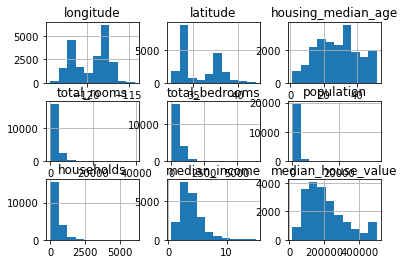

In [11]:
df.hist()

In [12]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

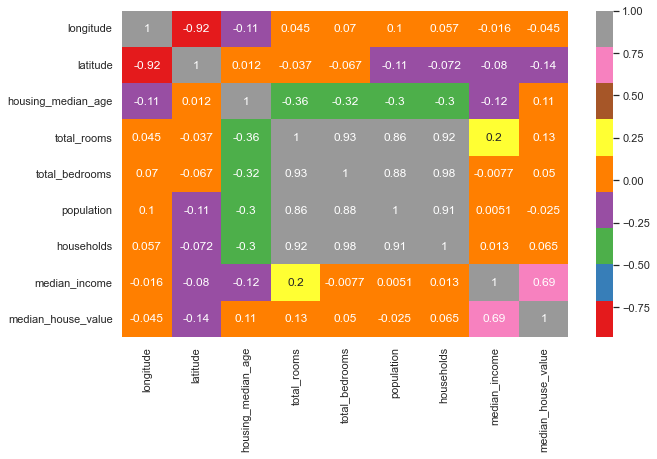

In [13]:
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(),annot=True,cmap='Set1')
plt.show()

In [14]:
#sns.pairplot(data = df,hue = 'ocean_proximity')

In [15]:
x=df.drop(columns='median_house_value',axis=1)
y=df['median_house_value']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [18]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
489,-122.25,37.86,48,2153,517.0,1656,459,3.0417,NEAR BAY
2117,-119.73,36.76,30,1548,282.0,886,311,3.1000,INLAND
18861,-122.19,38.13,5,7854,1446.0,4361,1395,4.9504,NEAR BAY
6855,-118.15,34.06,28,3855,922.0,2517,874,3.5050,<1H OCEAN
5321,-118.43,34.05,52,1693,290.0,727,305,6.7115,<1H OCEAN


In [19]:
x_train_oe=pd.get_dummies(x_train,columns=['ocean_proximity'])


In [20]:
x_train_oe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
489,-122.25,37.86,48,2153,517.0,1656,459,3.0417,0,0,0,1,0
2117,-119.73,36.76,30,1548,282.0,886,311,3.1000,0,1,0,0,0
18861,-122.19,38.13,5,7854,1446.0,4361,1395,4.9504,0,0,0,1,0
6855,-118.15,34.06,28,3855,922.0,2517,874,3.5050,1,0,0,0,0
5321,-118.43,34.05,52,1693,290.0,727,305,6.7115,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065,-117.88,33.79,32,1484,295.0,928,295,5.1418,1,0,0,0,0
17455,-120.43,34.70,26,2353,389.0,1420,389,3.8700,0,0,0,0,1
5249,-118.45,34.08,52,1500,176.0,384,145,7.1576,1,0,0,0,0
12290,-116.97,33.94,29,3197,632.0,1722,603,3.0432,0,1,0,0,0


In [21]:
x_test_oe=pd.get_dummies(x_test,columns=['ocean_proximity'])

In [22]:
x_test_oe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
6715,-118.18,34.14,38,3039,487.0,1131,465,7.7116,1,0,0,0,0
4121,-118.19,34.14,38,1826,300.0,793,297,5.2962,1,0,0,0,0
15433,-117.25,33.20,10,2050,473.0,1302,471,2.7961,1,0,0,0,0
20272,-119.23,34.19,16,5297,810.0,1489,667,6.4522,0,0,0,0,1
11843,-120.93,39.96,15,1666,351.0,816,316,2.9559,0,1,0,0,0


In [23]:
print(x_train_oe.shape)
print(x_test_oe.shape)
print(y_train.shape)
print(y_test.shape)

(16346, 13)
(4087, 13)
(16346,)
(4087,)


In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [25]:
x_train_oe.dtypes

longitude                     float64
latitude                      float64
housing_median_age              int64
total_rooms                     int64
total_bedrooms                float64
population                      int64
households                      int64
median_income                 float64
ocean_proximity_<1H OCEAN       uint8
ocean_proximity_INLAND          uint8
ocean_proximity_ISLAND          uint8
ocean_proximity_NEAR BAY        uint8
ocean_proximity_NEAR OCEAN      uint8
dtype: object

In [26]:
x_train_processed=pd.DataFrame(sc.fit_transform(x_train_oe),index=x_train_oe.index,\
                           columns=sc.get_feature_names_out(x_train_oe.columns))

In [27]:
x_train_processed

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
489,-1.339058,1.045686,1.539461,-0.221918,-0.053711,0.193252,-0.110006,-0.435947,-0.890789,-0.681878,-0.013549,2.816423,-0.383205
2117,-0.080127,0.529929,0.109650,-0.495197,-0.605031,-0.473210,-0.491997,-0.405079,-0.890789,1.466538,-0.013549,-0.355060,-0.383205
18861,-1.309084,1.172281,-1.876197,2.353232,2.125760,2.534522,2.305828,0.574640,-0.890789,-0.681878,-0.013549,2.816423,-0.383205
6855,0.709202,-0.736022,-0.049217,0.546878,0.896435,0.938477,0.961117,-0.190646,1.122601,-0.681878,-0.013549,-0.355060,-0.383205
5321,0.569321,-0.740710,1.857196,-0.429700,-0.586262,-0.610830,-0.507483,1.507077,1.122601,-0.681878,-0.013549,-0.355060,-0.383205
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065,0.844088,-0.862617,0.268518,-0.524106,-0.574532,-0.436857,-0.533293,0.675979,1.122601,-0.681878,-0.013549,-0.355060,-0.383205
17455,-0.429830,-0.435945,-0.208085,-0.131577,-0.354004,-0.011015,-0.290677,0.002608,-0.890789,-0.681878,-0.013549,-0.355060,2.609567
5249,0.559330,-0.726644,1.857196,-0.516879,-0.853711,-0.907708,-0.920446,1.743271,1.122601,-0.681878,-0.013549,-0.355060,-0.383205
12290,1.298702,-0.792286,0.030217,0.249659,0.216083,0.250377,0.261661,-0.435152,-0.890789,1.466538,-0.013549,-0.355060,-0.383205


In [28]:
x_test_processed=pd.DataFrame(sc.fit_transform(x_test_oe),index=x_test_oe.index,\
                             columns=sc.get_feature_names_out(x_test_oe.columns))

In [29]:
x_test_processed.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
6715,0.693748,-0.700858,0.739064,0.209853,-0.106625,-0.252923,-0.071184,1.966416,1.126071,-0.686056,-0.022127,-0.347343,-0.388097
4121,0.688774,-0.700858,0.739064,-0.377149,-0.572748,-0.578176,-0.536804,0.721771,1.126071,-0.686056,-0.022127,-0.347343,-0.388097
15433,1.156244,-1.138022,-1.482982,-0.268750,-0.141522,-0.088372,-0.054554,-0.566519,1.126071,-0.686056,-0.022127,-0.347343,-0.388097
20272,0.171574,-0.677605,-1.006830,1.302558,0.698496,0.091575,0.488670,1.317453,-0.888044,-0.686056,-0.022127,-0.347343,2.576675
11843,-0.673849,2.005840,-1.086188,-0.454577,-0.445624,-0.556043,-0.484145,-0.484175,-0.888044,1.457607,-0.022127,-0.347343,-0.388097


In [30]:
x_train_processed.dtypes

longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
ocean_proximity_<1H OCEAN     float64
ocean_proximity_INLAND        float64
ocean_proximity_ISLAND        float64
ocean_proximity_NEAR BAY      float64
ocean_proximity_NEAR OCEAN    float64
dtype: object

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_percentage_error

rf = RandomForestRegressor(n_estimators= 200, criterion="mse")
rf.fit(x_train_processed, y_train)
y_pred = rf.predict(x_test_processed)

RFR_r2 = r2_score(y_test, y_pred)
RFR_mape = mean_absolute_percentage_error(y_test, y_pred)

print("R² score:", RFR_r2)
print("mean_absolute_percentage_error", RFR_mape)

R² score: 0.8172949072672443
mean_absolute_percentage_error 0.1831265423390873


In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_processed,y_train)
y_pred=lr.predict(x_test_processed)
LR_r2=r2_score(y_test,y_pred)
LR_mape = mean_absolute_percentage_error(y_test, y_pred)

print('R2 score:',LR_r2)
print("mean_absolute_percentage_error", LR_mape)

R2 score: 0.6555002394382068
mean_absolute_percentage_error 0.2854189013675829


In [33]:
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor()
dr.fit(x_train_processed, y_train)
y_pred = dr.predict(x_test_processed)
DTR_r2 = r2_score(y_test, y_pred)
DTR_mape = mean_absolute_percentage_error(y_test, y_pred)
print('r2_score:', DTR_r2)
print("mean_absolute_percentage_error", DTR_mape)

r2_score: 0.6316473470574818
mean_absolute_percentage_error 0.2468818068437521


In [34]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train_processed,y_train)
y_pred_knr=rf.predict(x_test_processed)
KNN_r2=r2_score(y_test,y_pred_knr)
KNN_mape = mean_absolute_percentage_error(y_test, y_pred)
print('r2_score:',KNN_r2)
print("mean_absolute_percentage_error", KNN_mape)

r2_score: 0.8149169516715039
mean_absolute_percentage_error 0.2468818068437521


<AxesSubplot:>

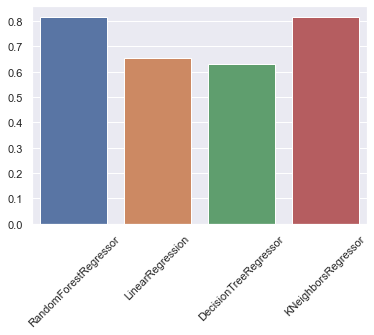

In [42]:
x=['RandomForestRegressor','LinearRegression','DecisionTreeRegressor','KNeighborsRegressor']
y=[RFR_r2,LR_r2,DTR_r2,KNN_r2]
plt.xticks(rotation=45,)
sns.barplot(x,y)

### Random Forest giving the  better accuracy than other algorithams


<AxesSubplot:>

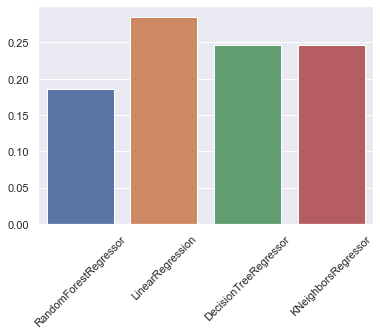

In [39]:
x=['RandomForestRegressor','LinearRegression','DecisionTreeRegressor','KNeighborsRegressor']
y=[RFR_mape,LR_mape,DTR_mape,KNN_mape]
plt.xticks(rotation=45,)
sns.barplot(x,y)

## Random Forest gives the less error